In [297]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from math import ceil


# The Data

In [245]:
df = pd.read_csv("../Staff_Size/Onboard_By_statyion_By_FY.csv").head(1).drop("ORGANIZATION",1)
df

,MAY-FY11,MAY-FY12,MAY-FY13,MAY-FY14,MAY-FY15,MAY-FY16
0,268699,272538.0,283338,294444,307430,318560


# How has staffing changed?

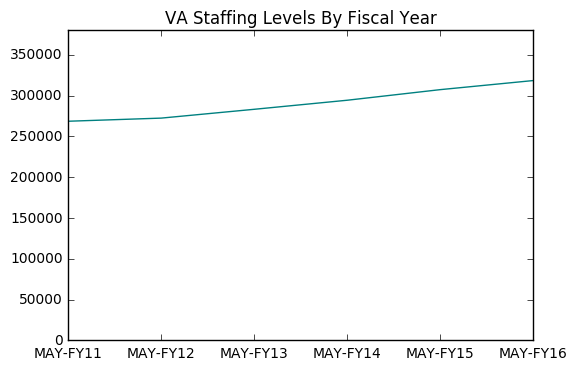

In [246]:
ax = df.transpose().plot(kind="line", color="teal")
ax.set_ylim(0,380000)
ax.set_title("VA Staffing Levels By Fiscal Year")
ax.legend_.remove()


## It looks like there's a pretty steady increase...but what happens when we subtract the choice hires? We should see a steady increase without choice hires since they should have been on top of usual hires

In [248]:
choice_hires = pd.read_csv("../Hiring/Hiring_Clean_All_Positions.csv")

In [266]:
percent_increase_dict = {}

choice_hires_total = choice_hires["NbrEmps"].sum()

MAY_FY16_no_choice_hires = df["MAY-FY16"] - choice_hires_total

percent_increase_dict["11-13"] = (df["MAY-FY13"] - df["MAY-FY11"])/df["MAY-FY11"]
percent_increase_dict["12-14"] = (df["MAY-FY14"] - df["MAY-FY12"])/df["MAY-FY12"]
percent_increase_dict["13-15"] = (df["MAY-FY15"] - df["MAY-FY13"])/df["MAY-FY13"]
percent_increase_dict["14-16"] = (df["MAY-FY16"] - df["MAY-FY14"])/df["MAY-FY14"]
percent_increase_dict["14-16 No Choice Hires"] = (MAY_FY16_no_choice_hires - df["MAY-FY14"])/df["MAY-FY14"]

percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
percent_increase

,11-13,12-14,13-15,14-16,14-16 No Choice Hires
0,0.054481,0.080378,0.085029,0.081904,0.040103


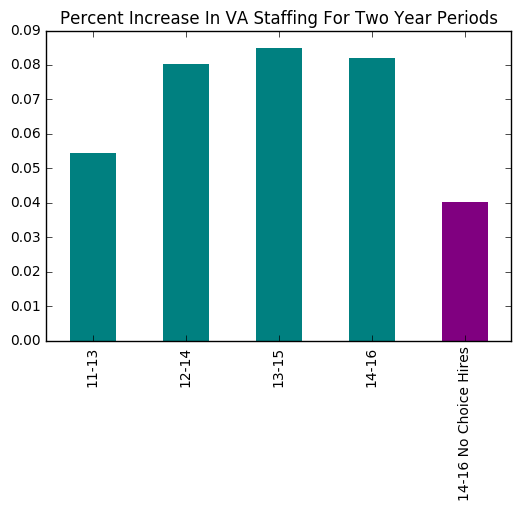

In [270]:
ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()


In [271]:
increase_dict = {}



increase_dict["11-13"] = (df["MAY-FY13"] - df["MAY-FY11"])
increase_dict["12-14"] = (df["MAY-FY14"] - df["MAY-FY12"])
increase_dict["13-15"] = (df["MAY-FY15"] - df["MAY-FY13"])
increase_dict["14-16"] = (df["MAY-FY16"] - df["MAY-FY14"])
increase_dict["14-16 No Choice Hires"] = (MAY_FY16_no_choice_hires - df["MAY-FY14"])

increase = pd.DataFrame.from_dict(increase_dict)
increase

,11-13,12-14,13-15,14-16,14-16 No Choice Hires
0,14639,21906.0,24092,24116,11808


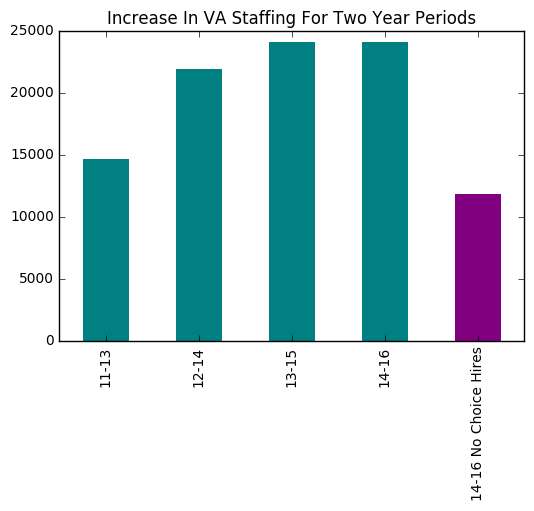

In [272]:
ax = increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()

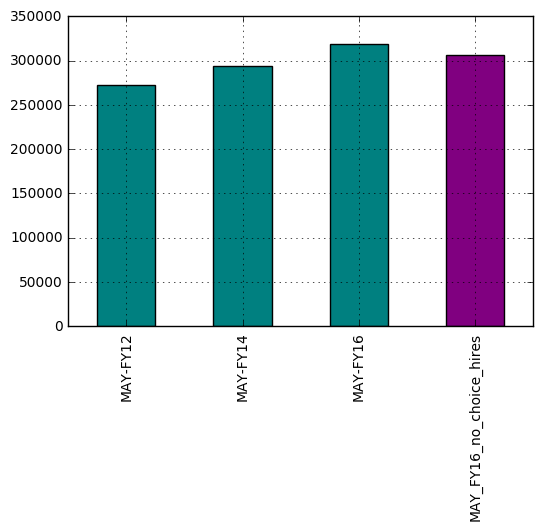

In [310]:
df["MAY_FY16_no_choice_hires"] = MAY_FY16_no_choice_hires

ax = df[["MAY-FY12","MAY-FY14","MAY-FY16","MAY_FY16_no_choice_hires"]].transpose().plot(kind='bar',color=['teal','teal','teal','purple'])
ax.legend_.remove()

ax.grid()

### Staffing level increases slowed down slightly between 2014 and 2016, even before you add in the choice hires. Without the choice hires, it's even worse. 

# Local Level

In [252]:
master = pd.read_csv("../Master/Master.csv")
master.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,SC_Wait_Complete_Increase,SC_Wait_Complete_Increase_%,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,-0.61,-0.182635,0.85,0.338645,0.44,0.307692,0.029907,0.033158,0.052457,0.050413
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.86,0.267081,1.07,0.272959,0.48,0.571429,0.038846,0.055806,0.047889,0.054539
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.71,0.133962,-1.34,-1.196429,-2.91,-0.792916,0.154349,0.093525,0.104459,0.102658
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,2.58,0.813880,-0.84,-0.506024,-0.46,-0.174905,0.047089,0.051000,0.088287,0.092925
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,-0.72,-0.197260,0.08,0.030075,-0.07,-0.023256,0.035160,0.031584,0.038942,0.042602


In [253]:

# Let's only look at locations that said they saw an increase in staff
staff_increased = master[master["Staff_14_To_16_Increase_%"] >0]

# Choice Staff Diff represents the increase in staff size from 2014 to 2016, minus 
staff_increased[staff_increased["Choice_Staff_Dif"] < 0]

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,SC_Wait_Complete_Increase,SC_Wait_Complete_Increase_%,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16
8,31376,3.16%,2.33,3.64,4.29,528al,(V02) (479) V2HCNALBANY NY,22.0,48.0,55.0,...,3.53,1.897849,3.16,1.356223,1.79,0.592715,0.001530,0.001209,0.001930,0.002135
14,40291,4.10%,1.53,6.65,2.03,561ne,(V03) (561) HCS EAST ORANGE NJ,2795.0,2762.0,2820.0,...,-1.19,-0.197347,-0.32,-0.209150,-1.32,-0.600000,0.069817,0.057650,0.064265,0.065790
19,29386,1.67%,3.21,5.66,1.78,503al,(V04) (503) MC ALTOONA PA,637.0,615.0,625.0,...,-1.15,-0.204263,-0.49,-0.152648,-0.66,-0.340206,0.022358,0.028339,0.043982,0.046067
20,24169,1.41%,0.32,7.49,0.69,529bu,(V04) (529) MC BUTLER PA,589.0,569.0,565.0,...,1.18,2.878049,0.54,1.687500,1.06,2.255319,0.023749,0.022372,0.066038,0.057648
21,24461,13.33%,10.03,14.74,7.81,540cl,(V04) (540) MC CLARKSBURG WV,820.0,814.0,860.0,...,-1.79,-0.238349,-4.81,-0.479561,-0.84,-0.246334,0.036017,0.035943,0.049146,0.051762
23,12514,6.11%,10.22,7.94,0.33,562er,(V04) (562) MC ERIE PA,678.0,669.0,660.0,...,1.89,0.684783,0.73,0.071429,0.50,0.980392,0.055058,0.029507,0.046833,0.042998
25,61615,9.30%,5.44,14.91,5.41,642ph,(V04) (642) MC PHILADELPHIA PA,2192.0,2125.0,2202.0,...,-0.82,-0.167347,-2.03,-0.373162,-0.80,-0.239521,0.037523,0.034180,0.058895,0.061133
27,23986,3.03%,4.59,2.00,3.00,693wi,(V04) (693) MC WILKES BARRE PA,1138.0,1123.0,1136.0,...,2.86,2.576577,9.12,1.986928,5.36,6.961039,0.049946,0.025606,0.046414,0.047214
28,51989,8.19%,12.39,7.70,3.93,512ba,(V05) (512) HCS BALTIMORE MD,3062.0,3120.0,3194.0,...,2.53,0.662304,-0.38,-0.030670,0.13,0.077844,0.061840,0.064183,0.071402,0.071253
30,41268,5.89%,7.91,6.31,8.83,688wa,(V05) (688) MC WASHINGTON DC,2240.0,2228.0,2249.0,...,-1.23,-0.326260,-4.28,-0.541087,-1.20,-0.341880,0.058108,0.048713,0.050277,0.051000


### The above locations saw an increase in staff between 2014 and 2016, but they saw more choice hires than they saw an increase in staff. This would suggest that choice hires were used to fill in poisitions that already existed (not what choice hires were supposed to be, from my understanding - they should be new positions on top of the old). Reporters should look into all of these locations. 

In [254]:
master[master["Staff_14_To_16_Increase_%"] < 0]


,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,SC_Wait_Complete_Increase,SC_Wait_Complete_Increase_%,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16
15,19748,2.37%,4.30,4.04,2.66,620va,(V03) (620) HCS MONTROSE NY,1553.0,1532.0,1543.0,...,0.14,0.052239,0.07,0.016279,0.64,0.496124,0.078843,0.069981,0.058424,0.056701
16,50081,1.31%,1.25,2.70,1.06,630ne,(V03) (630) HCS NEW YORK NY,3650.0,3587.0,3547.0,...,-0.14,-0.082840,0.88,0.704000,0.06,0.058824,0.073461,0.076273,0.072989,0.074326
17,34758,2.34%,5.31,6.43,1.54,632no,(V03) (632) MC NORTHPORT L I NY,1816.0,1856.0,1912.0,...,0.66,0.192982,2.11,0.397363,0.88,1.353846,0.054520,0.047810,0.061218,0.062419
18,23238,7.68%,16.97,8.87,3.72,460wi,(V04) (460) MROC WILMINGTON DE,916.0,916.0,941.0,...,2.51,0.413509,7.19,0.423689,7.27,2.439597,0.040150,0.027973,0.055237,0.055011
22,8857,1.06%,1.42,4.28,1.07,542co,(V04) (542) MC COATESVILLE PA,1373.0,1284.0,1261.0,...,2.08,1.230769,5.50,3.873239,2.54,2.791209,0.146212,0.082831,0.085428,0.071959
31,15041,5.45%,4.94,6.03,5.94,517be,(V06) (517) MC BECKLEY WV,724.0,743.0,762.0,...,0.73,0.122278,-3.47,-0.702429,0.09,0.032374,0.052988,0.054653,0.071448,0.059503
37,40073,4.79%,3.27,8.08,0.70,658sa,(V06) (658) MC SALEM VA,1808.0,1804.0,1922.0,...,6.47,1.394397,2.47,0.755352,1.49,2.403226,0.049460,0.032328,0.064022,0.057266
46,6049,3.24%,9.31,0.59,1.23,679tu,(V07) (679) MC TUSCALOOSA AL,1072.0,1033.0,1005.0,...,4.85,34.642857,2.24,0.240602,1.74,1.689320,0.166639,0.142653,0.098862,0.083361
73,14204,3.06%,2.66,5.07,4.57,556ca,(V12) (556) FHCC NORTH CHICAGO IL,1956.0,2049.0,2120.0,...,-0.36,-0.138996,-1.83,-0.687970,-0.31,-0.172222,0.149606,0.109807,0.071462,0.067325
77,14364,2.12%,1.28,3.89,2.16,676to,(V12) (676) MC TOMAH WI,1016.0,1026.0,1066.0,...,2.59,0.866221,1.58,1.234375,0.31,0.210884,0.076232,0.065837,0.063807,0.063085


In [255]:
reduced_staff = master[(master["Staff_14_To_16_Increase_%"] < 0)]

### These locations saw a decrease in staff sizes and should also be looked into. 

In [256]:
staff_increased[staff_increased["Choice_Staff_Dif"] < 0]["Choice_Hires"].describe()

count     22.000000
mean      85.545455
std       49.898685
min       14.000000
25%       56.750000
50%       77.000000
75%      104.750000
max      230.000000
Name: Choice_Hires, dtype: float64

In [257]:
master["Choice_Hires"]

0       47.0
1       47.0
2       13.0
3       86.0
4       48.0
5       36.0
6       59.0
7       41.0
8       14.0
9        4.0
10      30.0
11       NaN
12      32.0
13      51.0
14      51.0
15      21.0
16      54.0
17      47.0
18      56.0
19      68.0
20      31.0
21      59.0
22      37.0
23      30.0
24      80.0
25     163.0
26     179.0
27      71.0
28     230.0
29      51.0
       ...  
111     72.0
112     10.0
113     17.0
114     74.0
115    130.0
116     65.0
117    192.0
118    107.0
119     82.0
120     41.0
121      NaN
122     92.0
123    122.0
124      NaN
125    165.0
126    147.0
127    160.0
128    107.0
129    140.0
130    215.0
131    144.0
132    108.0
133     46.0
134     65.0
135     20.0
136     75.0
137     73.0
138     84.0
139     59.0
140     72.0
Name: Choice_Hires, dtype: float64